# Pattern Recognition: Histogram

In [1]:
import numpy as np
from PIL import Image as PILImage
import matplotlib.pyplot as plt

In [2]:
class Image:
    """
    A class to represent and process grayscale images.

    Attributes:
        pixels (np.ndarray): The pixel values of the image as a 2D NumPy array.
    """

    def __init__(self, pixel_array: np.ndarray) -> None:
        """
        Initialize the Image object with a pixel array.

        Args:
            pixel_array (np.ndarray): A 2D array of pixel values.
        """
        self.pixels = np.array(pixel_array)

    def histogram(self) -> np.ndarray:
        """
        Calculate the histogram of the pixel values in the image.

        Returns:
            np.ndarray: A 1D array of size 256, where each index represents
                        the frequency of the corresponding pixel value (0-255).
        """
        hist = np.zeros(256, dtype=int)
        flattened_pixels = self.pixels.flatten()
        for pixel_value in flattened_pixels:
            hist[pixel_value] += 1
        return hist

    @staticmethod
    def from_image_file(file_path: str) -> "Image":
        """
        Create an Image instance from a file.

        Args:
            file_path (str): The file path of the image.

        Returns:
            Image: An Image object with the grayscale pixel array.
        """
        img = PILImage.open(file_path).convert('L')  # Convert image to grayscale
        pixel_array = np.array(img)
        return Image(pixel_array)

    def apply_histogram_equalization(self) -> np.ndarray:
        """
        Apply histogram equalization to enhance the contrast of the image.

        Returns:
            np.ndarray: A 2D array of the equalized pixel values.
        """
        hist = self.histogram()
        cdf = hist.cumsum()  # Cumulative distribution function
        cdf_normalized = cdf * 255 / cdf[-1]  # Normalize CDF to range [0, 255]

        # Map original pixel values to equalized values using the normalized CDF
        equalized_pixels = np.interp(self.pixels.flatten(), np.arange(256), cdf_normalized)
        return equalized_pixels.reshape(self.pixels.shape).astype(np.uint8)

    def save_image(self, file_name: str) -> None:
        """
        Save the image to a specified file.

        Args:
            file_name (str): The file path to save the image.
        """
        img = PILImage.fromarray(self.pixels)
        img.save(file_name)

In [5]:
def display_images(original_image: PILImage.Image, transformed_pixels: np.ndarray) -> None:
    """
    Display the original and transformed images side by side.

    Args:
        original_image (PILImage.Image): The original grayscale image.
        transformed_pixels (np.ndarray): The pixel values of the transformed image.
    """
    transformed_img = PILImage.fromarray(transformed_pixels)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Histogram Equalized")
    plt.imshow(transformed_img, cmap='gray')
    plt.axis('off')

    plt.show()

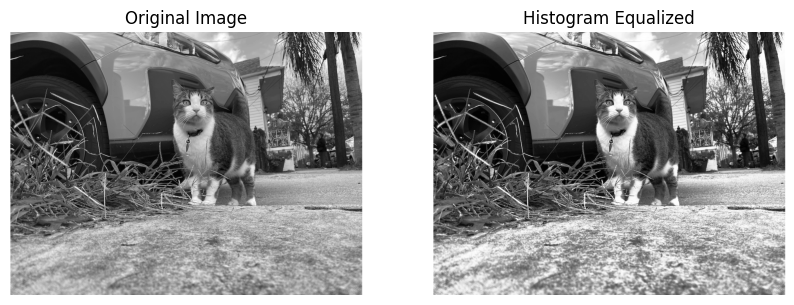

In [6]:
def main() -> None:
    """
    Load an image, apply histogram equalization, and display the results.
    """
    # File path of the image
    image_file_path = "/content/nola-cat.png"

    # Load the image and convert it to grayscale
    image_from_file = Image.from_image_file(image_file_path)

    # Apply histogram equalization
    transformed_pixels = image_from_file.apply_histogram_equalization()

    # Display original and transformed images
    original_img = PILImage.open(image_file_path).convert('L')
    display_images(original_img, transformed_pixels)


# Run the main function
if __name__ == "__main__":
    main()